## CUSTOMER SEGMENTATION: CAMPAIGN AND RFM ANALYSIS
Author: Edycakra Immanuel Sinaga

In [93]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
df= pd.read_csv("../dataset/processed/marketingcampaign_processed.csv", encoding="latin1")

In [95]:
df.head()

,CustomerID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,age,weeks_since_joining,months_since_joining,total_spending,marital_status_new,child_new,education_new
0,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,69,496,114,27,0,1,1
1,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,58,524,121,776,1,0,1
2,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,39,499,115,53,1,1,1
3,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,42,503,116,422,1,1,3
4,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,3,11,0,56,521,120,716,1,0,2


RECENCY (How recently did the customer purchase?)

In [96]:
df["Recency"]

0       38
1       26
2       26
3       94
4       16
        ..
1978    81
1979    46
1980    91
1981     8
1982    40
Name: Recency, Length: 1983, dtype: int64

FREQUENCY (How often do they purchase?)

In [97]:
df["Frequency"]=df["NumCatalogPurchases"]+df["NumDealsPurchases"]+df["NumStorePurchases"]+df["NumWebPurchases"]

In [98]:
df["Frequency"]

0        6
1       21
2        8
3       19
4       22
        ..
1978     4
1979    18
1980    19
1981    23
1982    11
Name: Frequency, Length: 1983, dtype: int64

MONETARY (How much do they spend?)

In [99]:
df["Monetary"]=df["total_spending"]

RFM in 1 table

In [100]:
selected_columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
df[selected_columns].head()

,CustomerID,Recency,Frequency,Monetary
0,2174,38,6,27
1,4141,26,21,776
2,6182,26,8,53
3,5324,94,19,422
4,7446,16,22,716


In [101]:
# Function to rank values into 5 groups
def rank_group(series):
    return pd.qcut(series, q=5, labels=[1, 2, 3, 4, 5])

# Rank 'Recency,' 'Frequency,' and 'Monetary' into 5 groups
df['Recency_Rank'] = rank_group(df['Recency'])
df['Frequency_Rank'] = rank_group(df['Frequency'])
df['Monetary_Rank'] = rank_group(df['Monetary'])


In [102]:
df.head()

,CustomerID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,months_since_joining,total_spending,marital_status_new,child_new,education_new,Frequency,Monetary,Recency_Rank,Frequency_Rank,Monetary_Rank
0,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,114,27,0,1,1,6,27,2,1,1
1,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,121,776,1,0,1,21,776,2,4,4
2,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,115,53,1,1,1,8,53,2,2,2
3,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,116,422,1,1,3,19,422,5,4,3
4,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,120,716,1,0,2,22,716,1,5,4


In [103]:
# Calculate 'Average Rank'
df['Average_Rank'] = (df['Recency_Rank'].astype(int) + df['Frequency_Rank'].astype(int) + df['Monetary_Rank'].astype(int)) / 3


In [107]:

# Define 'Segment' based on specified criteria
def segment_customer(row):
    if row['Recency_Rank'] <= 2 and row['Monetary_Rank'] >= 4 and row['Frequency_Rank'] >= 4:
        return 'Champions'
    elif row['Monetary_Rank'] >= 4 and row['Frequency_Rank'] >= 3:
        return 'Potential Loyalist'
    elif row['Recency_Rank'] <=2 and row['Monetary_Rank'] >= 3:
        return 'New Customers'
    elif row['Recency_Rank'] <= 2 and row['Frequency_Rank'] <= 3 and row['Monetary_Rank'] <= 3:
        return 'At Risk Customers'
    else:
        return 'Potential Churn Customers'

df['Segment'] = df.apply(segment_customer, axis=1)


In [108]:
selected_columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Recency_Rank', 'Frequency_Rank', 'Monetary_Rank', 'Segment']
df[selected_columns].head()

,CustomerID,Recency,Frequency,Monetary,Recency_Rank,Frequency_Rank,Monetary_Rank,Segment
0,2174,38,6,27,2,1,1,At Risk Customers
1,4141,26,21,776,2,4,4,Champions
2,6182,26,8,53,2,2,2,At Risk Customers
3,5324,94,19,422,5,4,3,Potential Churn Customers
4,7446,16,22,716,1,5,4,Champions


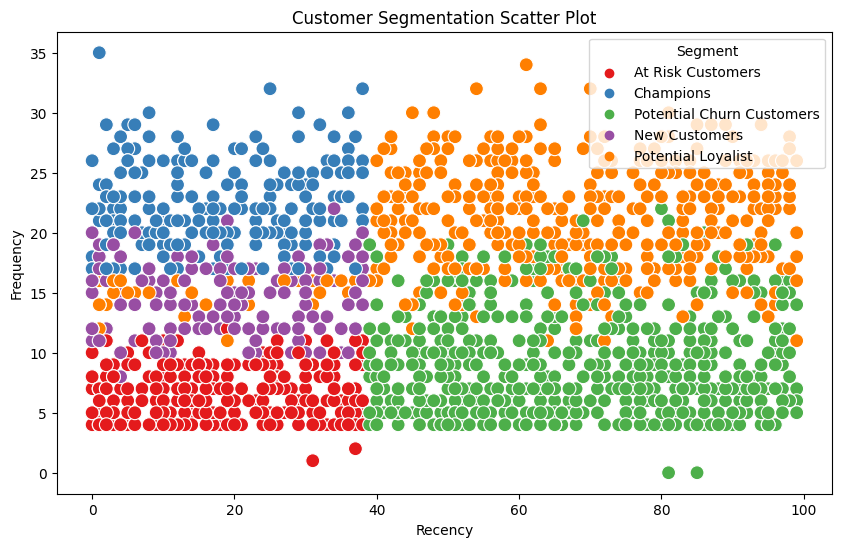

In [109]:
# Create a scatter plot with color-coding for segments
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Recency',
    y='Frequency',
    hue='Segment',
    data=df,
    palette='Set1',  
    s=100,  
)
plt.title('Customer Segmentation Scatter Plot')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Segment', loc='upper right')
plt.show()

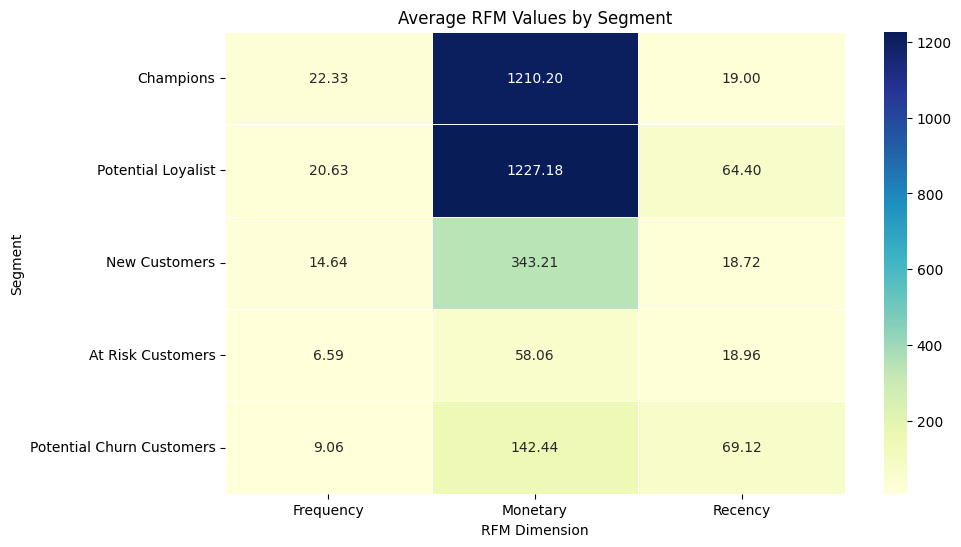

In [110]:
# Define the desired order of segments
segment_order = [
    'Champions',
    'Potential Loyalist',
    'New Customers',
    'At Risk Customers',
    'Potential Churn Customers'
]

# Reorder the 'Segment' column based on the desired order
df['Segment'] = pd.Categorical(df['Segment'], categories=segment_order, ordered=True)

# Create a pivot table with the reordered segment order
pivot_table = df.pivot_table(
    values=['Recency', 'Frequency', 'Monetary'],
    index='Segment',
    aggfunc='mean'
)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table,
    annot=True,  # Display values in each cell
    cmap='YlGnBu',  # Choose a color map
    fmt='.2f',  # Format for displaying values
    linewidths=0.5,  # Add linewidths between cells
)
plt.title('Average RFM Values by Segment')
plt.xlabel('RFM Dimension')
plt.ylabel('Segment')
plt.show()

RFM K-Means

In [111]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [112]:
# Select the features for clustering
rfm_data = df[['Recency', 'Frequency', 'Monetary']]

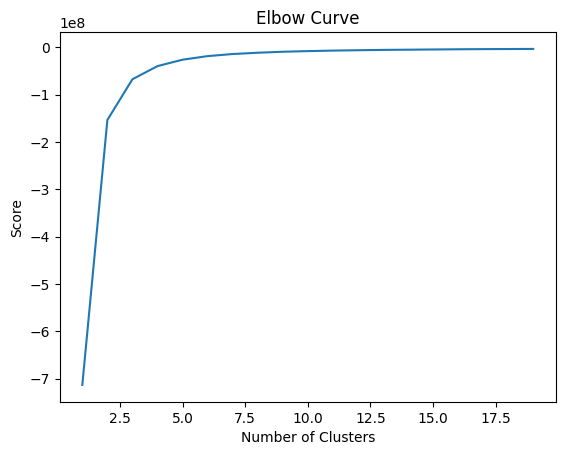

In [113]:
# Get right number of cluster for K-means using Elbow method
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(rfm_data).score(rfm_data) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [114]:
# Standardize the data 
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# Fit K-means clustering with the chosen K
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analyze the clusters and segment the customers
cluster_means = df.groupby('Cluster')['Recency', 'Frequency', 'Monetary'].mean()


/var/folders/6y/m46bq7nn33x47c0f9z7l5b2h0000gn/T/ipykernel_80193/4028859158.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_means = df.groupby('Cluster')['Recency', 'Frequency', 'Monetary'].mean()


In [115]:
cluster_means

,Recency,Frequency,Monetary
Cluster,,,
0,22.691542,9.338308,164.968491
1,74.070588,8.964706,147.757983
2,49.691720,21.361783,1217.346497


Plot the Result

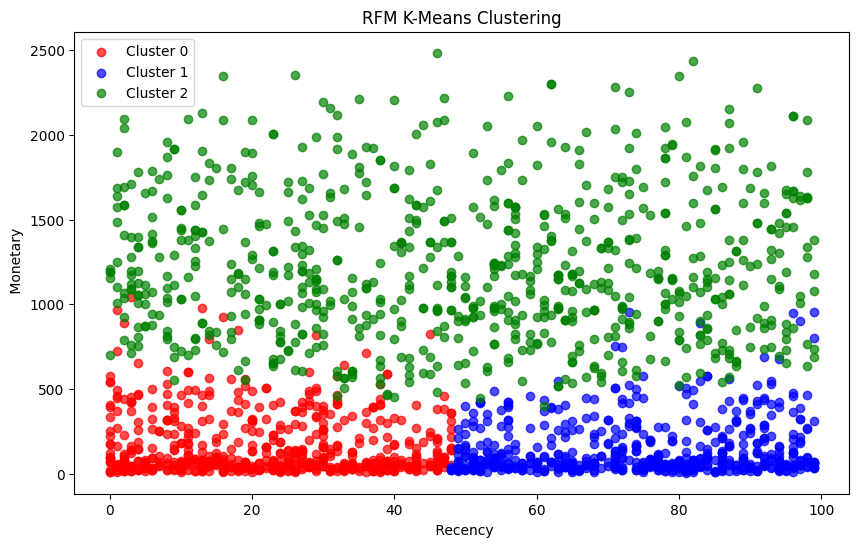

In [117]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a color map for clusters
cluster_colors = {0: 'red', 1: 'blue', 2: 'green'}  # Customize colors as needed

# Plot each data point with cluster-specific color
for cluster_id, color in cluster_colors.items():
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(
        cluster_data['Recency'],
        cluster_data['Monetary'],
        c=color,
        label=f'Cluster {cluster_id}',
        alpha=0.7,  # Adjust transparency
    )

# Add labels and legend
plt.xlabel(' Recency')
plt.ylabel(' Monetary')
plt.title('RFM K-Means Clustering')
plt.legend()

# Show the plot
plt.show()

Create new variable of cluster

In [118]:
df["cluster"]=kmeans.labels_
df["cluster"].head(10)

0    0
1    2
2    0
3    1
4    2
5    2
6    0
7    0
8    1
9    2
Name: cluster, dtype: int32

More Visualization

In [119]:
import seaborn as sns

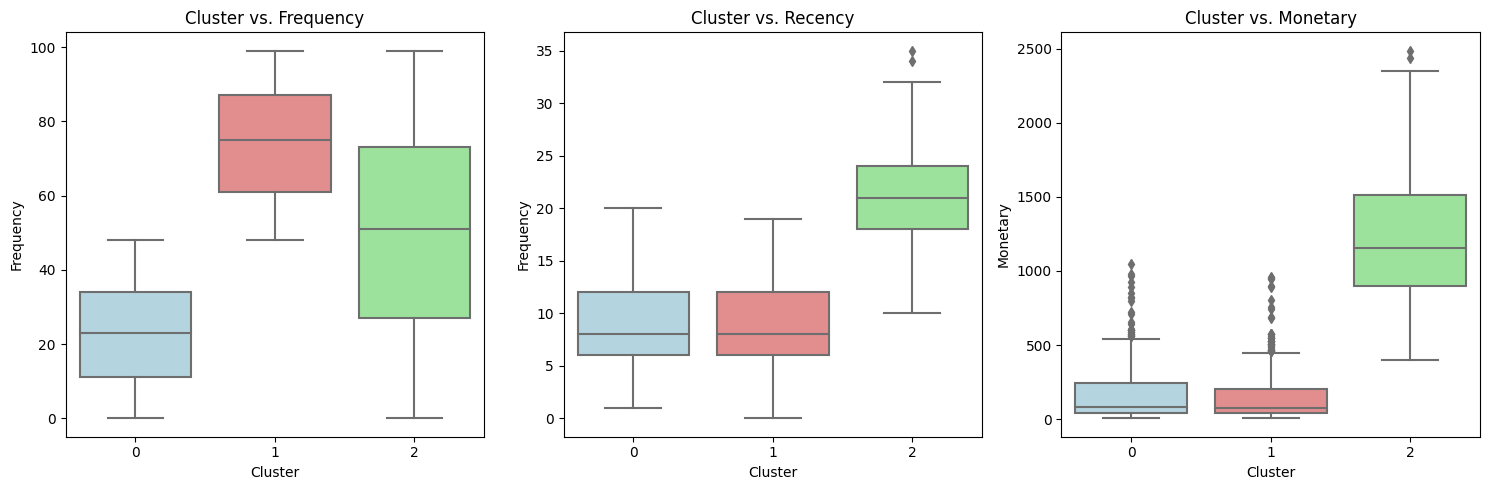

In [120]:
# Create subplots for boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Custom colors for the bars
colors = ['lightblue', 'lightcoral', 'lightgreen']

# Boxplot of Cluster vs. Recency
sns.boxplot(x='Cluster', y='Recency', data=df, ax=axes[0], palette=colors)
axes[1].set_title('Cluster vs. Recency')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Recency')

# Boxplot of Cluster vs. Frequency
sns.boxplot(x='Cluster', y='Frequency', data=df, ax=axes[1], palette=colors)
axes[0].set_title('Cluster vs. Frequency')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Frequency')

# Boxplot of Cluster vs. Monetary
sns.boxplot(x='Cluster', y='Monetary', data=df, ax=axes[2], palette=colors)
axes[2].set_title('Cluster vs. Monetary')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Monetary')

# Adjust layout
plt.tight_layout()

# Show the boxplots
plt.show()

INTERPRETATIONS

- Cluster 0:

Recency: These customers have interacted with our business fairly recently.
Frequency: These customers make purchases or interact with our business moderately frequently.
Monetary: These customers have a moderate spending level.

- Cluster 1:

Recency: Customers haven't interacted with our business for a longer period compared to Cluster 0.
Frequency: Similar to Cluster 0, suggesting moderate interaction frequency.
Monetary: These customers have a moderate spending level.

- Cluster 2:

Recency: The average recency for customers in this cluster falls between the values of Clusters 0 and 1.
Frequency: Customers in this cluster have a significantly higher average frequency, suggesting that they interact with our business much more frequently.
Monetary: The average monetary value is substantially higher, indicating that customers in this cluster are high spenders.

INSIGHTS

- Cluster 2 appears to be the most valuable cluster as it consists of customers with high spending (Monetary) and high interaction frequency (Frequency). More upselling and offer bundling promotions.

- Cluster 0 and Cluster 1 represent customers with moderate recency, frequency, and spending, with Cluster 1 having a longer period of inactivity (higher Recency) compared to Cluster 0.

- Cluster 0 (Low Spender and New Customers): discount promotions to make them repurchase

- Cluster 1 (Low Spender and Old Customers): discount promotions and personalized email

CREATE ADDITIONAL VARIABLES FOR TABLEAU PURPOSE

In [121]:
# Create another new column 'marital_string'
df['marital_string'] = df['marital_status_new'].apply(lambda x: 'married' if x > 0 else 'not married')


In [122]:
# Create another new column 'child_string'
df['child_string'] = df['child_new'].apply(lambda x: 'have child' if x > 0 else 'not have any')


In [123]:
# Create another new column 'edu_string'
df['edu_string'] = df['education_new'].apply(lambda x: 'highschool' if x == 0 else ('undergraduate' if x == 1 else ('master' if x == 2 else 'phd')))


In [124]:
df.head()

,CustomerID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Recency_Rank,Frequency_Rank,Monetary_Rank,Average_Rank,Segment,Cluster,cluster,marital_string,child_string,edu_string
0,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,1,1,1.333333,At Risk Customers,0,0,not married,have child,undergraduate
1,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,4,4,3.333333,Champions,2,2,married,not have any,undergraduate
2,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,2,2,2.000000,At Risk Customers,0,0,married,have child,undergraduate
3,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,4,3,4.000000,Potential Churn Customers,1,1,married,have child,phd
4,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,1,5,4,3.333333,Champions,2,2,married,not have any,master


In [125]:
#write to csv 
df.to_csv('../dataset/processed/marketingcampaign_tableau.csv', index=False)

# FIN